# Bias Mitigation Analysis - Bank + Marketing

In [1]:
data_name = 'bank+marketing'

In [2]:
from analysis_utils import *
%matplotlib inline

In [3]:
# define desired metric for the use case
ACC_METRIC = 'avg_norm_mcc_score'
FAIR_METRIC = 'abs_avg_spd_score'

In [4]:
import os
import pandas as pd
import numpy as np
results_all = pd.DataFrame()
dir_path = './{}_results/'.format(data_name)
for file in os.listdir(dir_path):
    print(file)
    result = pd.read_pickle(dir_path+file)
    results_all = pd.concat([results_all, result])

bank+marketing_results_TabTrans
bank+marketing_results_RF
bank+marketing_results_LR
bank+marketing_results_NB
bank+marketing_results_GB


In [5]:
print(results_all.shape)
results_all.head(2)

(800, 19)


,base_estimator,param,Bias_Mitigation,threshold,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score,avg_spd_score,avg_aod_score,avg_eod_score,avg_ford_score,avg_ppvd_score,avg_(1-consistency_score),avg_gei_score,avg_ti_score,cost
0,TabTrans,"{'epochs': 20, 'learing_rate': 0.0001}",None,0.3,0.886023,0.658507,0.424822,0.836264,0.372127,0.686063,-0.134495,-0.114674,-0.080086,-0.051168,-0.073150,0.097561,0.060526,0.092490,0.448432
1,TabTrans,"{'epochs': 20, 'learing_rate': 0.0001}",None,0.4,0.892880,0.630161,0.384876,0.836264,0.359892,0.679946,-0.100860,-0.089542,-0.052094,-0.037795,-0.083239,0.069802,0.058541,0.096489,0.420914


In [6]:
import seaborn as sns
accuracy_metrics = ['acc_score', 'bacc_score', 'f1_score', 'auc_score', 'mcc_score','norm_mcc_score']
group_fairness = ['spd_score', 'aod_score', 'eod_score','ford_score','ppvd_score']
individual_fairness = ['(1-consistency_score)','gei_score','ti_score']
fairness_metrics = group_fairness+individual_fairness
avg_accuracy_metrics = ['avg_'+col for col in accuracy_metrics]
avg_fairness_metrics = ['avg_'+col for col in fairness_metrics]
avg_group_fairness_metrics = ['avg_'+col for col in group_fairness]

In [7]:
results_all_converted = results_all.copy(deep=True).reset_index(drop=True)
for col in avg_fairness_metrics:
    abs_col_name = 'abs_'+col
    results_all_converted[abs_col_name] = results_all_converted[col].abs()
# round threshold since 0.4 was 0.399999999 
results_all_converted.threshold = round(results_all_converted.threshold,2)
# base estimator invariant in-processing methods shouldn't have any parameter value
results_all_converted.loc[results_all_converted.Bias_Mitigation.isin(['AD','LFR_in']),['param']] = ''

In [8]:
base_invariant = results_all_converted.loc[results_all_converted.Bias_Mitigation.isin(['AD','LFR_in'])]
for base in results_all_converted.base_estimator.unique():
    if results_all_converted[(results_all_converted.base_estimator==base)\
                             &((results_all_converted.Bias_Mitigation=='AD')|(results_all_converted.Bias_Mitigation=='LFR_in'))].shape[0]==0:
        dup = base_invariant.copy()
        dup['base_estimator'] = dup['base_estimator'].replace({'LR':base})
        results_all_converted = pd.concat([results_all_converted, dup])
results_all_converted.head()

,base_estimator,param,Bias_Mitigation,threshold,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score,...,avg_ti_score,cost,abs_avg_spd_score,abs_avg_aod_score,abs_avg_eod_score,abs_avg_ford_score,abs_avg_ppvd_score,abs_avg_(1-consistency_score),abs_avg_gei_score,abs_avg_ti_score
0,TabTrans,"{'epochs': 20, 'learing_rate': 0.0001}",None,0.3,0.886023,0.658507,0.424822,0.836264,0.372127,0.686063,...,0.092490,0.448432,0.134495,0.114674,0.080086,0.051168,0.073150,0.097561,0.060526,0.092490
1,TabTrans,"{'epochs': 20, 'learing_rate': 0.0001}",None,0.4,0.892880,0.630161,0.384876,0.836264,0.359892,0.679946,...,0.096489,0.420914,0.100860,0.089542,0.052094,0.037795,0.083239,0.069802,0.058541,0.096489
2,TabTrans,"{'epochs': 20, 'learing_rate': 0.0001}",None,0.5,0.894340,0.602858,0.329475,0.836264,0.334790,0.667395,...,0.101391,0.399333,0.066728,0.053667,0.031004,0.023304,0.097358,0.049320,0.058495,0.101391
3,TabTrans,"{'epochs': 20, 'learing_rate': 0.0001}",None,0.6,0.894583,0.580853,0.274964,0.836264,0.312011,0.656005,...,0.105519,0.392804,0.048809,0.043553,0.016978,0.031290,0.101428,0.034912,0.058724,0.105519
4,TabTrans,"{'epochs': 20, 'learing_rate': 0.0001}",None,0.7,0.891730,0.554387,0.197208,0.836264,0.262616,0.631308,...,0.111391,0.391848,0.023156,0.015867,0.005577,0.072624,0.113383,0.022862,0.060649,0.111391


In [9]:
results_all_converted.base_estimator.value_counts()

RF          200
LR          200
NB          200
GB          200
TabTrans    160
Name: base_estimator, dtype: int64

In [10]:
# BEST MODELS
scoring = (ACC_METRIC,FAIR_METRIC,1,1)
w_acc = scoring[2]
w_fair = scoring[3]
acc_cost = 1-results_all_converted[ACC_METRIC]
fair_cost = abs(results_all_converted[FAIR_METRIC])

results_all_converted['cost'] = w_acc*acc_cost + w_fair*fair_cost
best_models = results_all_converted.sort_values(by='cost')[['base_estimator','param','Bias_Mitigation','threshold',
                                                            ACC_METRIC,FAIR_METRIC,'cost']].drop_duplicates(subset='cost').head(10)
best_models.rename({ACC_METRIC: 'Norm. MCC',
                    FAIR_METRIC: 'Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper()}, axis=1, inplace=True)
best_models.columns = [col if best_models.columns.get_loc(col) in [4,5]\
                       else col.replace('_',' ').title() for col in best_models.columns] 
f = {best_models.columns[i]:'{:.4f}' for i in range(-3,0)}
f.update({'Threshold':'{:.1f}'})
styled_best_models = best_models.style.format(f).hide(axis="index")
print(styled_best_models.to_latex(hrules=True, label="table:results_{}".format(data_name),
                                  caption="Top 5 Models for {}".format(data_name)).replace('_','\_'))
display(styled_best_models)

\begin{table}
\caption{Top 5 Models for bank+marketing}
\label{table:results\_bank+marketing}
\begin{tabular}{lllrrrr}
\toprule
Base Estimator & Param & Bias Mitigation & Threshold & Norm. MCC & Abs. SPD & Cost \\
\midrule
GB & {'criterion': 'friedman\_mse', 'max\_depth': 8, 'n\_estimators': 50} & RW+ROC & 0.5 & 0.7659 & 0.0154 & 0.2495 \\
RF & {'criterion': 'gini', 'max\_depth': 16, 'n\_estimators': 10} & ROC & 0.5 & 0.7431 & 0.0043 & 0.2613 \\
RF & {'criterion': 'entropy', 'max\_depth': 16, 'n\_estimators': 10} & ROC & 0.5 & 0.7405 & 0.0035 & 0.2630 \\
RF & {'criterion': 'gini', 'max\_depth': 16, 'n\_estimators': 50} & ROC & 0.5 & 0.7505 & 0.0210 & 0.2706 \\
GB &  & AD & 0.4 & 0.7713 & 0.0443 & 0.2729 \\
RF & {'criterion': 'entropy', 'max\_depth': 16, 'n\_estimators': 50} & ROC & 0.5 & 0.7452 & 0.0200 & 0.2748 \\
GB & {'criterion': 'friedman\_mse', 'max\_depth': 8, 'n\_estimators': 50} & ROC & 0.5 & 0.7656 & 0.0410 & 0.2754 \\
RF &  & AD & 0.5 & 0.7436 & 0.0205 & 0.2769 \\
RF & {'cri

Base Estimator,Param,Bias Mitigation,Threshold,Norm. MCC,Abs. SPD,Cost
GB,"{'criterion': 'friedman_mse', 'max_depth': 8, 'n_estimators': 50}",RW+ROC,0.5,0.7659,0.0154,0.2495
RF,"{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 10}",ROC,0.5,0.7431,0.0043,0.2613
RF,"{'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 10}",ROC,0.5,0.7405,0.0035,0.2630
RF,"{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 50}",ROC,0.5,0.7505,0.0210,0.2706
GB,,AD,0.4,0.7713,0.0443,0.2729
RF,"{'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 50}",ROC,0.5,0.7452,0.0200,0.2748
GB,"{'criterion': 'friedman_mse', 'max_depth': 8, 'n_estimators': 50}",ROC,0.5,0.7656,0.0410,0.2754
RF,,AD,0.5,0.7436,0.0205,0.2769
RF,"{'criterion': 'gini', 'max_depth': 16, 'n_estimators': 10}",RW+ROC,0.5,0.7438,0.0232,0.2795
RF,"{'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 10}",RW+ROC,0.5,0.7427,0.0260,0.2832


In [11]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]

## Analysis like in Chen et al. (2023)

In [12]:
diff_dict = {}
for base in results_all_converted.base_estimator.unique():
    None_table = results_all_converted[(results_all_converted.base_estimator==base)&
                                       (results_all_converted.Bias_Mitigation=='None')].reset_index(drop=True)
    diff_dict[base] = {}
    for BM in results_all_converted[results_all_converted.base_estimator==base].Bias_Mitigation.unique():
        if BM == 'None': pass
        else: 
            # print(BM)
            BM_subtable = results_all_converted[(results_all_converted.base_estimator==base)&
                                                (results_all_converted.Bias_Mitigation==BM)].reset_index(drop=True)
            diff_table = BM_subtable.iloc[:,:4]
            diff_table = pd.concat([diff_table,BM_subtable.iloc[:,4:].subtract(None_table.iloc[:,4:])], axis=1)
            diff_dict[base][BM] = diff_table

In [13]:
df = pd.DataFrame()
for base in diff_dict.keys():
    sub_df = pd.concat(diff_dict[base])
    df = pd.concat([df, pd.concat(diff_dict[base])])
df

base_estimator                                   param Bias_Mitigation  \
RW 0        TabTrans  {'epochs': 20, 'learing_rate': 0.0001}              RW   
   1        TabTrans  {'epochs': 20, 'learing_rate': 0.0001}              RW   
   2        TabTrans  {'epochs': 20, 'learing_rate': 0.0001}              RW   
   3        TabTrans  {'epochs': 20, 'learing_rate': 0.0001}              RW   
   4        TabTrans  {'epochs': 20, 'learing_rate': 0.0001}              RW   
...              ...                                     ...             ...   
AD 15             GB                                                      AD   
   16             GB                                                      AD   
   17             GB                                                      AD   
   18             GB                                                      AD   
   19             GB                                                      AD   

       threshold  avg_acc_score  avg_bacc_score  avg_f1_score  avg_auc_score  \
RW 0         0.3      -0.004269        0.023253      0.029018       0.019426   
   1         0.4      -0.001504        0.011696      0.019950       0.019426   
   2         0.5       0.001062        0.011672      0.026935       0.019426   
   3         0.6       0.000177        0.005758      0.015344       0.019426   
   4         0.7       0.000818        0.005958      0.018763       0.019426   
...          ...            ...             ...           ...            ...   
AD 15        0.3       0.021212        0.100011      0.132818       0.142081   
   16        0.4       0.027405        0.063248      0.115671       0.142081   
   17        0.5       0.025127        0.008157      0.051275       0.142081   
   18        0.6       0.021079       -0.043667     -0.034206       0.142081   
   19        0.7       0.015815       -0.093393     -0.144269       0.142081   

       avg_mcc_score  avg_norm_mcc_score  ...  avg_ti_score      cost  \
RW 0        0.017563            0.008781  ...     -0.003833  0.004076   
   1        0.008336            0.004168  ...     -0.001916  0.001865   
   2        0.018061            0.009030  ...     -0.002543  0.008723   
   3        0.007044            0.003522  ...     -0.001144 -0.006660   
   4        0.013313            0.006656  ...     -0.001377  0.003299   
...              ...                 ...  ...           ...       ...   
AD 15       0.148988            0.074494  ...     -0.024656 -0.111685   
   16       0.131379            0.065690  ...     -0.018436 -0.123558   
   17       0.077174            0.038587  ...     -0.007123 -0.117616   
   18       0.018089            0.009045  ...      0.003828 -0.092014   
   19      -0.049416           -0.024708  ...      0.014667 -0.064859   

       abs_avg_spd_score  abs_avg_aod_score  abs_avg_eod_score  \
RW 0            0.012857          -0.001615           0.013698   
   1            0.006033          -0.000738           0.003557   
   2            0.017754           0.019389           0.010343   
   3           -0.003138          -0.011805           0.001905   
   4            0.009955           0.011011           0.005610   
...                  ...                ...                ...   
AD 15          -0.037191           0.025528          -0.042623   
   16          -0.057869           0.032747          -0.049342   
   17          -0.079029           0.036851          -0.059044   
   18          -0.082969           0.031394          -0.051535   
   19          -0.089567           0.023787          -0.050240   

       abs_avg_ford_score  abs_avg_ppvd_score  abs_avg_(1-consistency_score)  \
RW 0            -0.005946           -0.001604                       0.016828   
   1             0.012426           -0.002712                       0.009095   
   2            -0.013253           -0.007479                       0.006096   
   3            -0.021773            0.004331                       0.003539   
   4          

In [14]:
(df.iloc[:,4:10]>0).sum()/df.shape[0]

avg_acc_score         0.441860
avg_bacc_score        0.297674
avg_f1_score          0.300000
avg_auc_score         0.263953
avg_mcc_score         0.317442
avg_norm_mcc_score    0.317442
dtype: float64

In [15]:
(df[df.Bias_Mitigation=='RW'].avg_norm_mcc_score>0).value_counts(normalize=True)

True     0.51
False    0.49
Name: avg_norm_mcc_score, dtype: float64

### Accuracy Behavior After Bias Mitigations

,avg_acc_score,avg_bacc_score,avg_f1_score,avg_auc_score,avg_mcc_score,avg_norm_mcc_score
noorincrease,34,24,24,15,25,25
small,0,0,1,2,0,0
medium,0,0,0,0,1,1
large,9,19,18,26,17,17


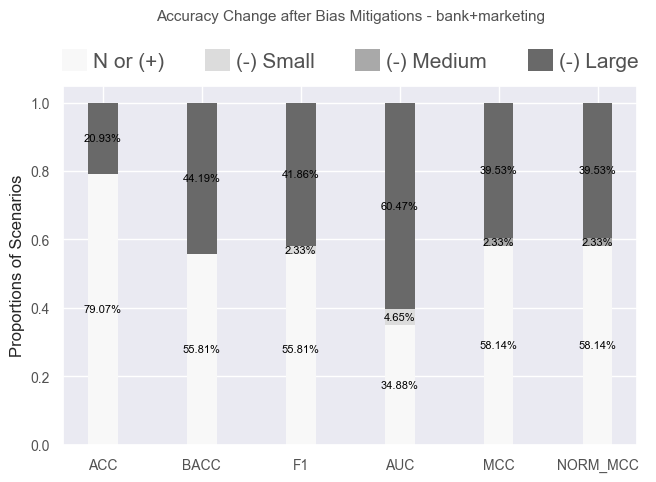

In [16]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=avg_accuracy_metrics)
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, caption='Accuracy Change after Bias Mitigations - {}', figsize=(8, 6))

### Accuracy Behavior After Bias Mitigations per BM

,RW,ROC,CEO,RW+ROC,RW+CEO,LFR_pre,EGR,LFR_in,AD
noorincrease,5,5,1,5,1,0,3,0,5
small,0,0,0,0,0,0,0,0,0
medium,0,0,0,0,0,0,1,0,0
large,0,0,4,0,4,4,0,5,0


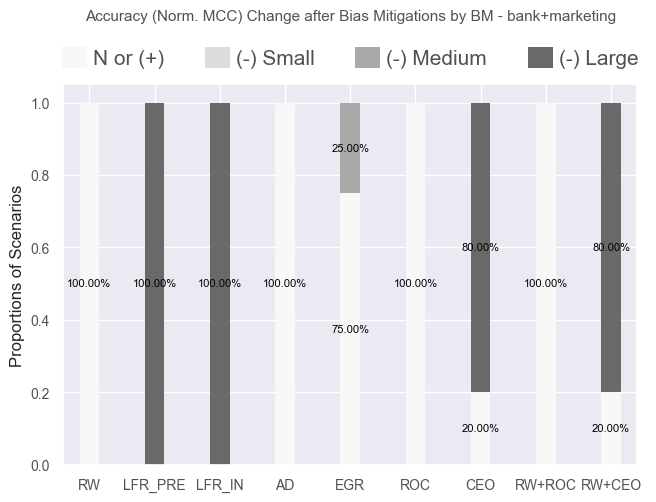

In [17]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[ACC_METRIC], category='bm')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='bm', 
                        caption='Accuracy (Norm. MCC) Change after Bias Mitigations by BM - {}', figsize=(8, 6))

In [18]:
# diff_degree, table = behaviour_analysis(data=results_all_converted, metric_list=avg_accuracy_metrics, category='bm')
# plot_behaviour_analysis(table, data_name, category='bm', caption='Accuracy Change after applying Bias Mitigations per BM ({})', figsize=(12, 6))

### Accuracy Behavior After Bias Mitigations per base

,TabTrans,RF,LR,NB,GB
noorincrease,6,5,5,4,5
small,0,0,0,0,0
medium,0,0,0,1,0
large,1,4,4,4,4


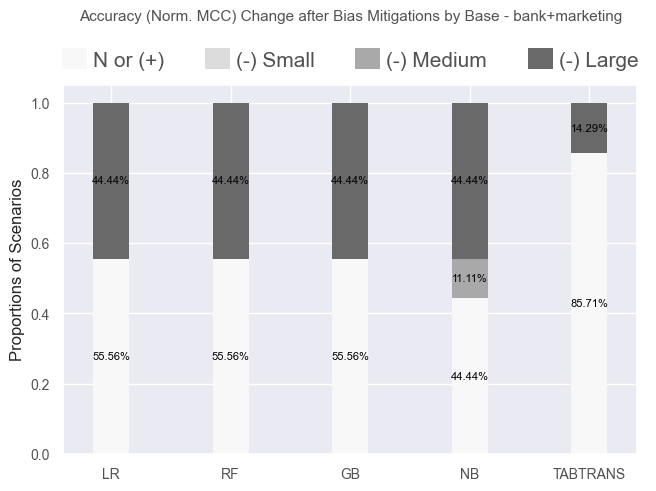

In [19]:
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[ACC_METRIC], category='base')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='base', 
                        caption='Accuracy (Norm. MCC) Change after Bias Mitigations by Base - {}', figsize=(8, 6))

In [20]:
# diff_degree, table = behaviour_analysis(data=results_all_converted, metric_list=avg_accuracy_metrics, category='base')
# plot_behaviour_analysis(table, data_name, category='base', caption='Accuracy Change after applying Bias Mitigations per Base ({})', figsize=(12, 6))

### Fairness Behavior After Bias Mitigations

,abs_avg_spd_score,abs_avg_aod_score,abs_avg_eod_score,abs_avg_ford_score,abs_avg_ppvd_score,abs_avg_(1-consistency_score),abs_avg_gei_score,abs_avg_ti_score
noorincrease,21,23,22,36,39,27,35,41
small,0,2,0,0,0,0,1,0
medium,1,1,2,0,0,2,3,0
large,21,17,19,7,4,14,4,2


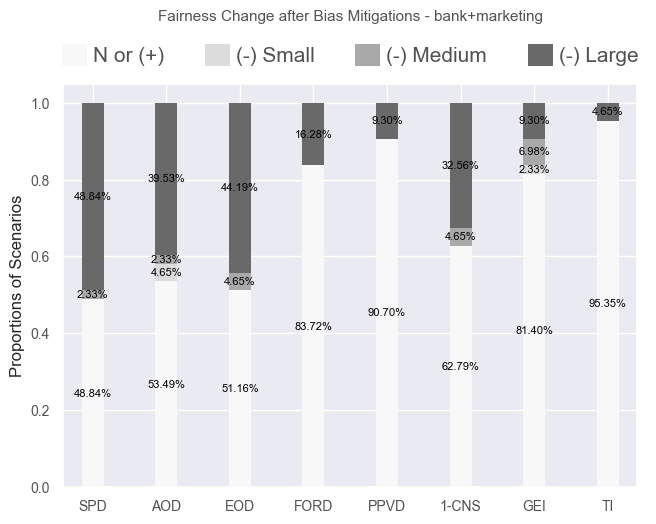

In [20]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=abs_avg_fairness_metrics)
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, caption='Fairness Change after Bias Mitigations - {}', figsize=(8, 6))

### Fairness Behavior After Bias Mitigations per BM

,RW,ROC,CEO,RW+ROC,RW+CEO,LFR_pre,EGR,LFR_in,AD
noorincrease,2,5,5,2,4,1,2,0,0
small,0,0,0,0,0,0,0,0,0
medium,1,0,0,0,0,0,0,0,0
large,2,0,0,3,1,3,2,5,5


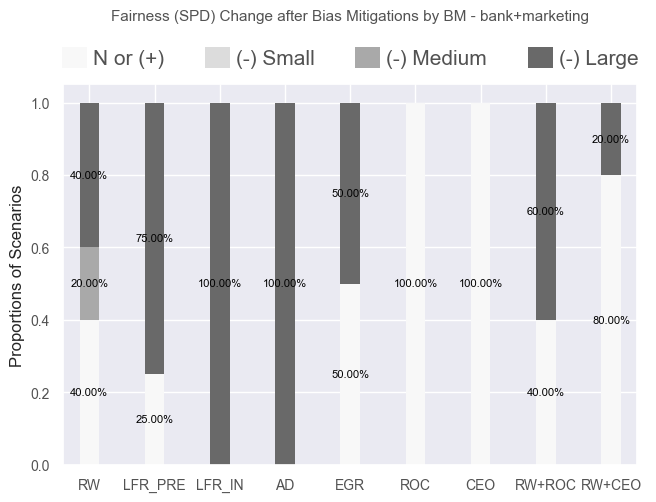

In [21]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[FAIR_METRIC], category='bm')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='bm', 
                        caption='Fairness (%s) Change after Bias Mitigations by BM - {}'%(FAIR_METRIC.split('_')[2].upper()),
                        figsize=(8, 6))

In [23]:
# abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
# diff_degree, table = behaviour_analysis(data=results_all_converted, metric_list=abs_avg_fairness_metrics, category='bm')
# plot_behaviour_analysis(table, data_name, category='bm', caption='Fairness Change after applying Bias Mitigations per BM ({})', figsize=(12, 6))

### Fairness Behavior After Bias Mitigations per base

,TabTrans,RF,LR,NB,GB
noorincrease,5,4,4,2,6
small,0,0,0,0,0
medium,0,1,0,0,0
large,2,4,5,7,3


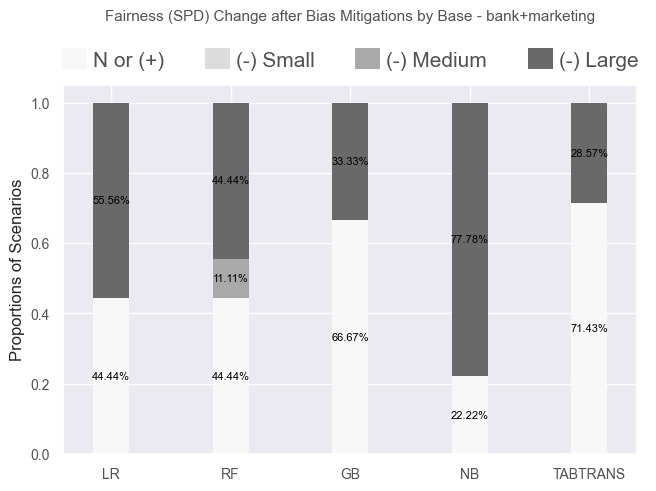

In [22]:
abs_avg_fairness_metrics = ['abs_'+ele for ele in avg_fairness_metrics]
diff_degree = behaviour_analysis(data=results_all_converted, metric_list=[FAIR_METRIC], category='base')
display(pd.DataFrame(diff_degree))
plot_behaviour_analysis(diff_degree, data_name, category='base', 
                        caption='Fairness (%s) Change after Bias Mitigations by Base - {}'%(FAIR_METRIC.split('_')[2].upper()),
                        figsize=(8, 6))

## Accuracy vs. Fairness

### General Results

(slope > 0: trade-off)
We can see from the graphs below:

1. Overall trend: the higher the accuracy, the lower the group fairness (positive slope)
2. But the choice of metrics does matter:
    - group fairness: ford_score showcased no "trade-offs"
    - accuracy metrics: f1_score and roc_auc_score showed milder "trade-offs"
    - same fairness metric combined with different accuracy metrics can present both positive/negative relations, vice versa

In [23]:
import matplotlib.pyplot as plt

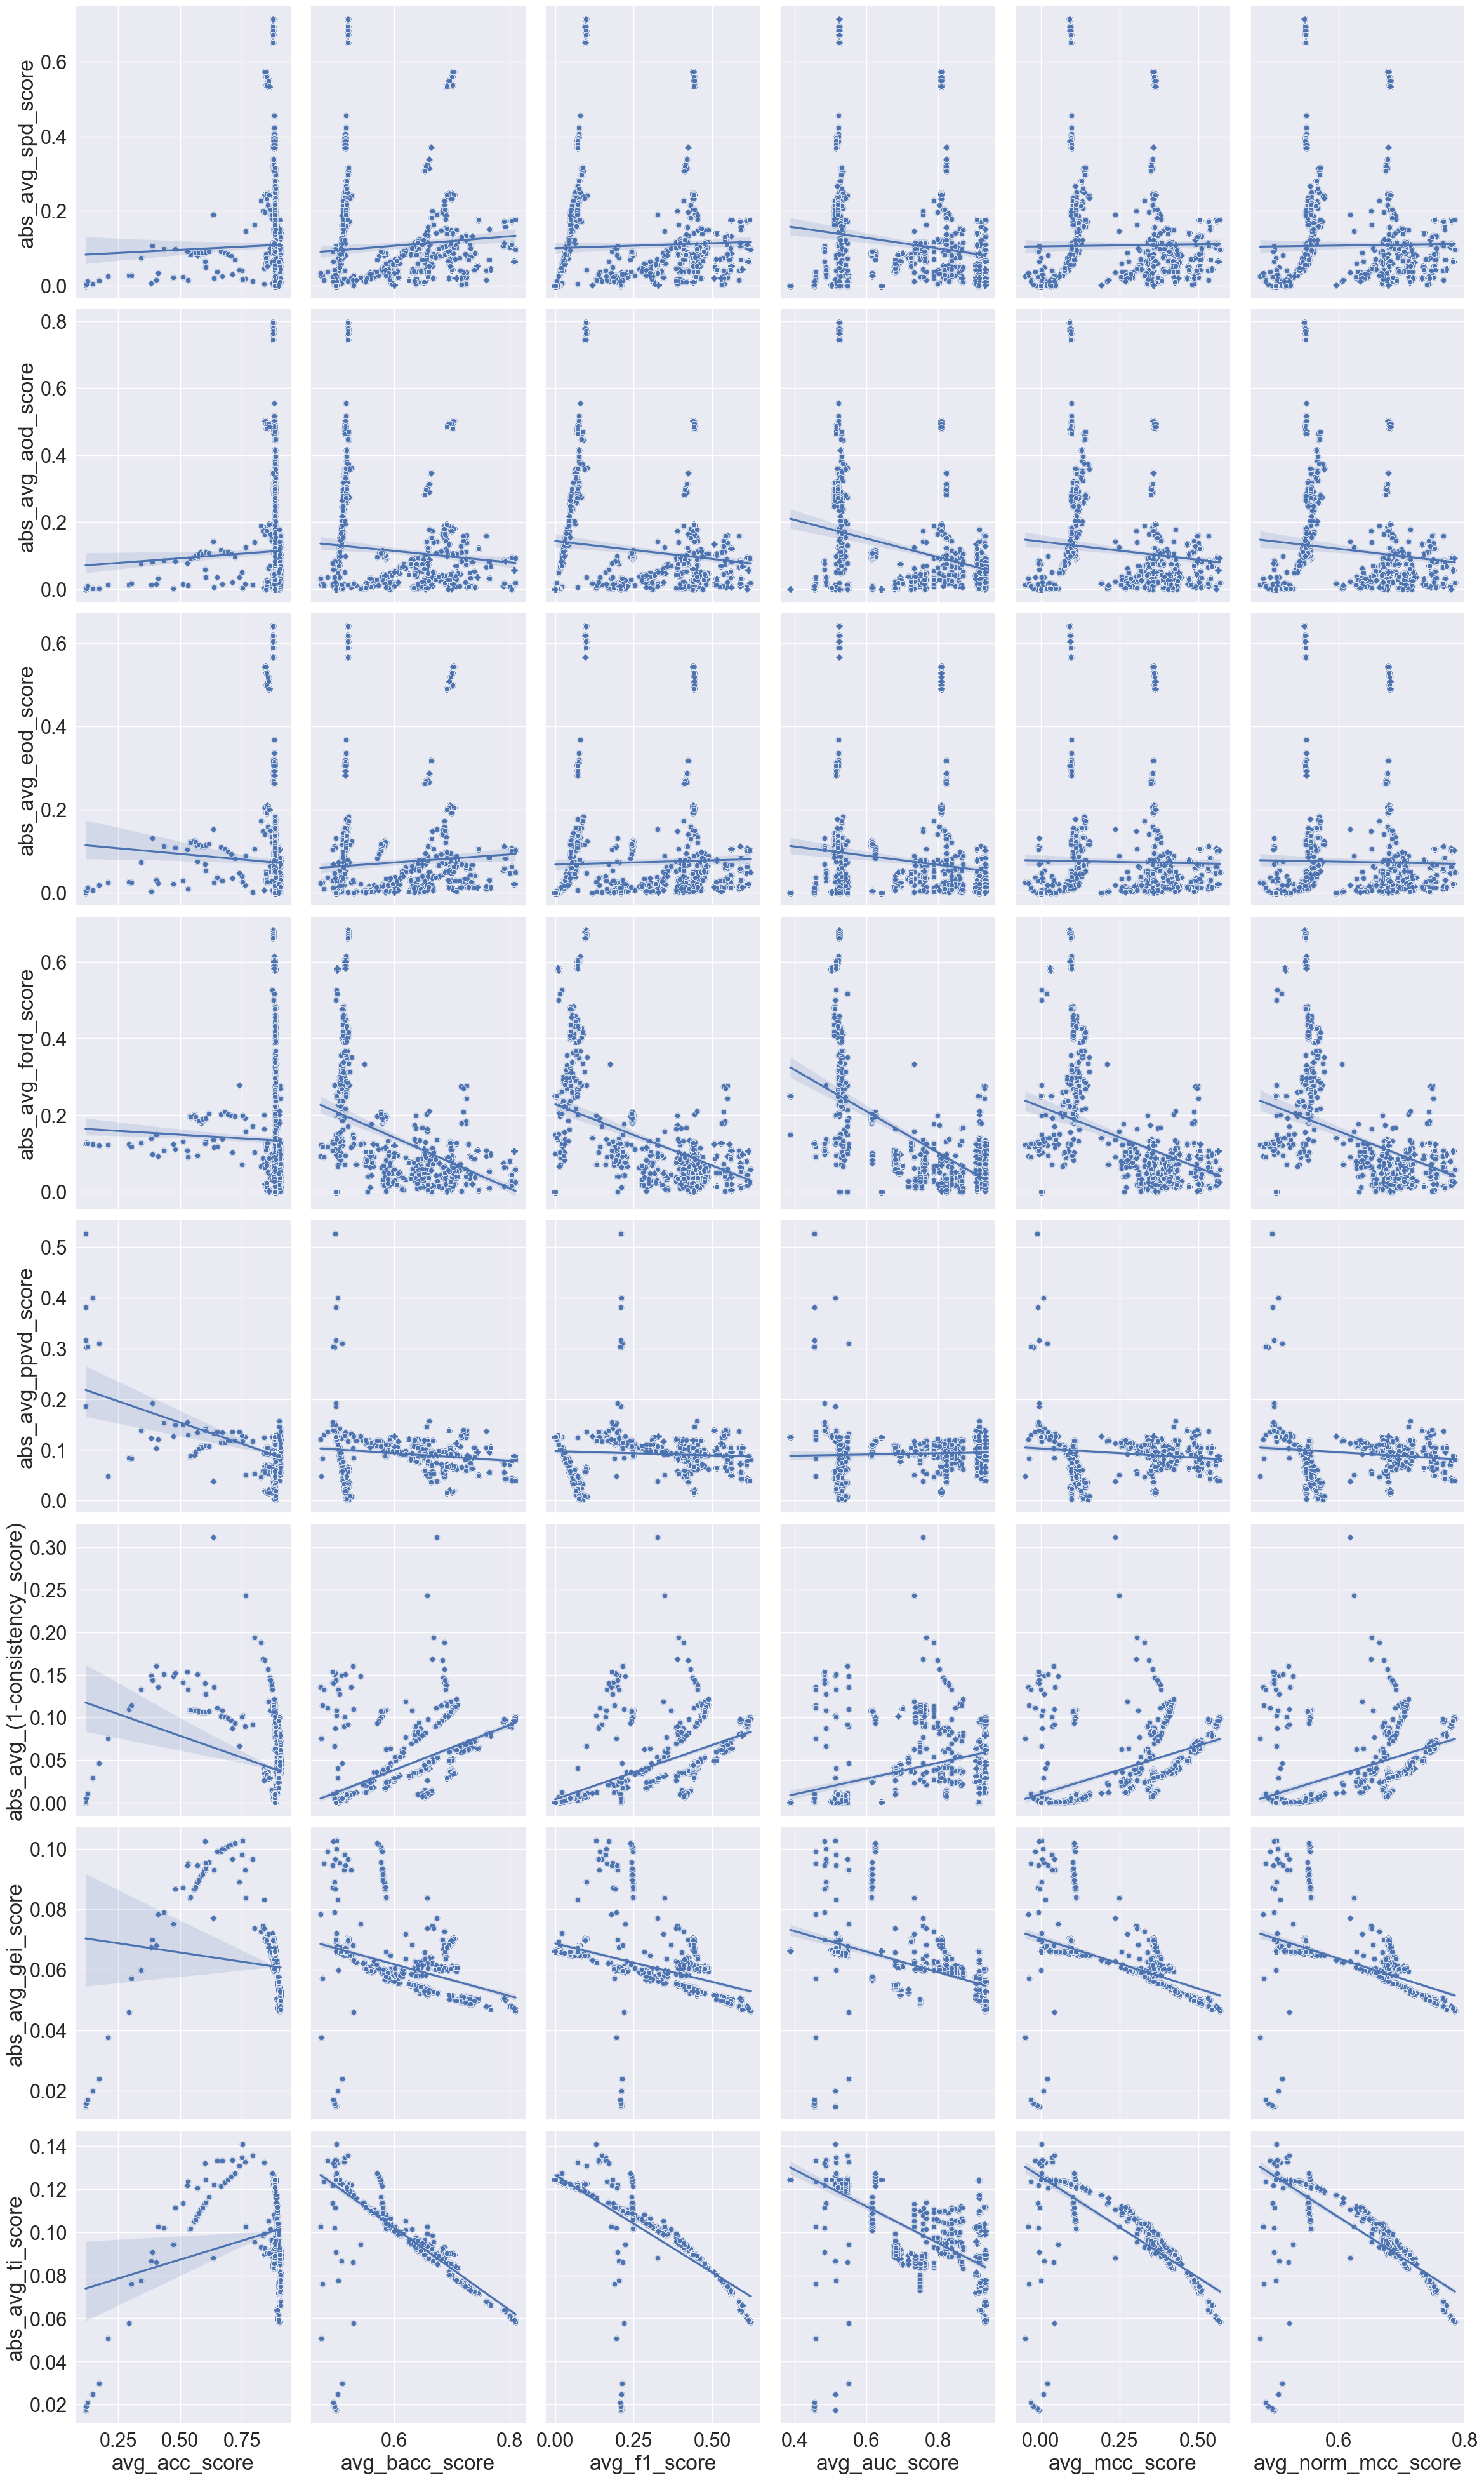

In [24]:
# Set plot font
plt.rcParams.update({'font.family':'serif'})
plt.rcParams.update({'font.serif':'Times New Roman'})

sns.set(font_scale = 2)
abs_fairness_metrics = ['abs_'+col for col in avg_fairness_metrics]
g = sns.pairplot(data=results_all_converted, x_vars=avg_accuracy_metrics, y_vars=abs_fairness_metrics,
             height=5, aspect=.8, kind="reg")
g.map(sns.scatterplot)

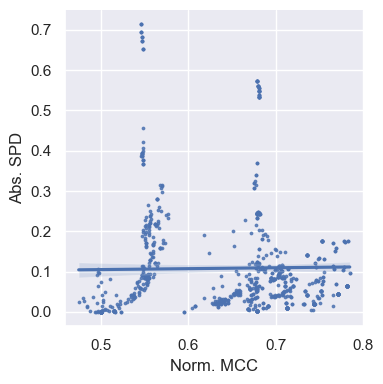

In [25]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, height=4, scatter_kws={'s':3})
# .fig.suptitle("Graph (a)")
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_general'+'.png', bbox_inches='tight')

### Base_estimator specific Results

We can see from the graphs below:
1. Different base_estimators can also generate very different results:
    - SVM (red) the least robust, while "NB" manifest clear trend
    - base_estimators divided into two groups when it comes to consistency_score: tree-based, ensemble (trade-offs) vs non tree-based, non ensemble

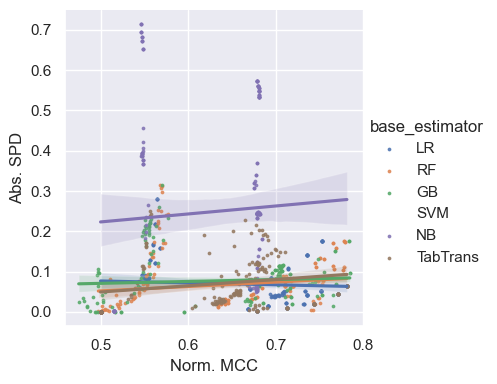

In [26]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='base_estimator', 
               hue_order = ['LR','RF','GB','SVM','NB','TabTrans'], height=4, scatter_kws={'s':3})
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_Base'+'.png', bbox_inches='tight')

### Threshold specific Results

We can see from the graphs below:

1. Using different threshold also yiels different results:
    - most obvious with (f1_score, group_fairness) combinations

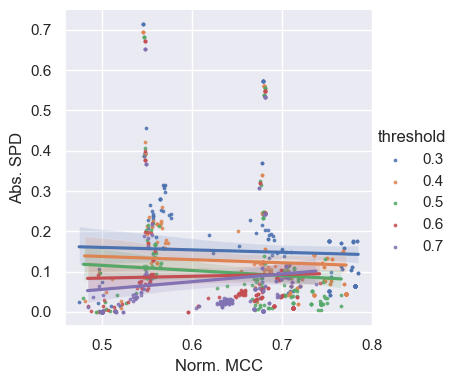

In [27]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='threshold', height=4, scatter_kws={'s':3})
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_threshold'+'.png', bbox_inches='tight')

Consideration: put in Appendix?

In [35]:
# for threshold in sorted(results_all_converted.threshold.unique()):
#     sns.set(font_scale = 1)
#     g = sns.lmplot(data=results_all_converted[results_all_converted.threshold==threshold], x=ACC_METRIC, y=FAIR_METRIC, hue='threshold', height=4)
#     ax = plt.gca()
#     ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
#     # save plot
#     g.savefig('./Result_Plots/'+data_name+'_2D_threshold'+'.png', bbox_inches='tight')

### Bias_mitigation specific Results

We can see from the graphs below:

1. Results are clearly divided into two groups
2. Generally with wide C.I.

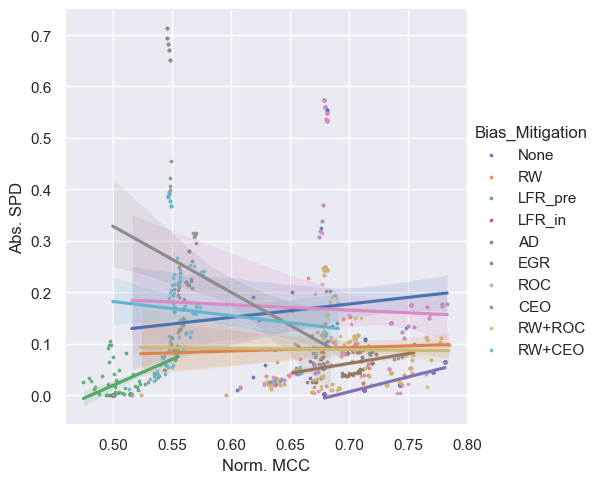

In [28]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='Bias_Mitigation', 
               hue_order=['None','RW','LFR_pre','LFR_in','AD','EGR','ROC','CEO','RW+ROC','RW+CEO'],
               scatter_kws={'s': 3}, height=5)
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_BM'+'.png', bbox_inches='tight')

### Bias Mitigation Category

In [30]:
bm_category = {'PRE':['RW', 'LFR_pre'],
               'IN': ['LFR_in','AD','EGR'],
               'POST':['ROC','CEO'],
               'PRE+POST':['RW+ROC','RW+CEO']}

In [31]:
results_all_converted['BM_Category'] = results_all_converted['Bias_Mitigation'].replace({v: k for k, l in bm_category.items()\
                                                                                         for v in l})
results_all_converted[['Bias_Mitigation','BM_Category']].drop_duplicates()

,Bias_Mitigation,BM_Category
0,None,None
5,RW,PRE
10,ROC,POST
15,CEO,POST
20,RW+ROC,PRE+POST
25,RW+CEO,PRE+POST
130,LFR_pre,PRE
135,EGR,IN
295,LFR_in,IN
300,AD,IN


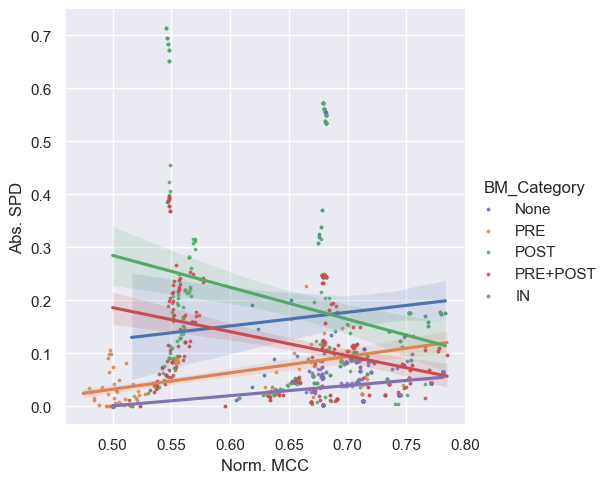

In [32]:
sns.set(font_scale = 1)
g = sns.lmplot(data=results_all_converted, x=ACC_METRIC, y=FAIR_METRIC, hue='BM_Category', 
               scatter_kws={'s': 3}, height=5)
ax = plt.gca()
ax.set(xlabel='Norm. MCC', ylabel='Abs. '+FAIR_METRIC.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper())
# save plot
g.savefig('./Result_Plots/'+data_name+'_2D_BM_Category'+'.png', bbox_inches='tight')

## Heatmap

No clear trend between group and individual fairness with a few exceptions

In [33]:
# change column name so metrics name get more concise in the heatmaps
accuracy_map = [col.removeprefix('avg_').removesuffix('_score').upper() for col in avg_accuracy_metrics]
print(accuracy_map)
fairness_map = [col.removeprefix('abs_').removeprefix('avg_').removesuffix('_score').upper() for col in abs_avg_fairness_metrics]
fairness_map = ['1-CNS' if x=='(1-CONSISTENCY_SCORE)' else x for x in fairness_map]
print(fairness_map)

acc_rename = {avg_accuracy_metrics[i]:accuracy_map[i] for i in range(len(accuracy_map))}
fair_rename = {abs_avg_fairness_metrics[i]:fairness_map[i] for i in range(len(fairness_map))}
results_all_converted = results_all_converted.rename(columns=acc_rename).rename(columns=fair_rename)

['ACC', 'BACC', 'F1', 'AUC', 'MCC', 'NORM_MCC']
['SPD', 'AOD', 'EOD', 'FORD', 'PPVD', '1-CNS', 'GEI', 'TI']


### Original Metrics

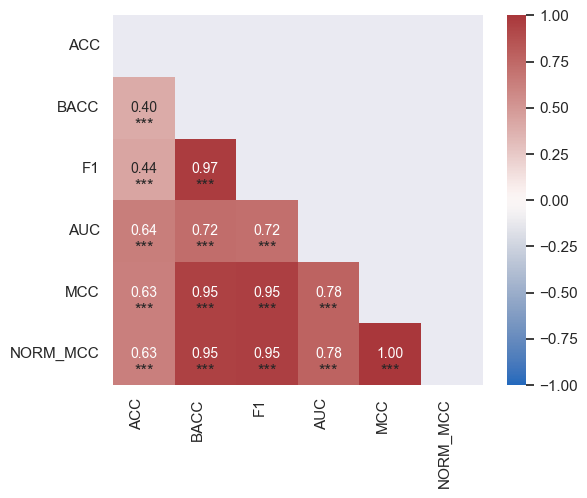

In [34]:
# original, spearman
g = corr_heatmap_with_significance(results_all_converted[accuracy_map], acc=True)
g.figure.savefig('./Heatmap/'+data_name+'_original_acc_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

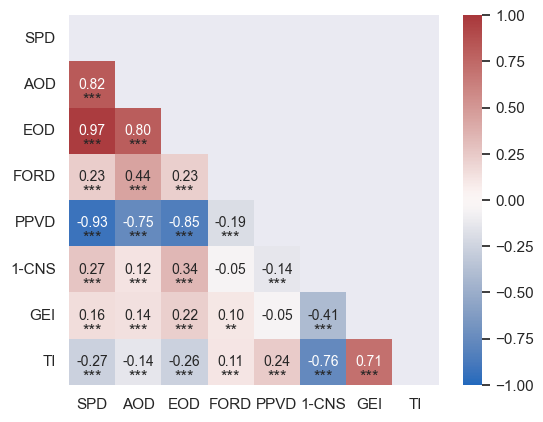

In [35]:
# original, spearman
g = corr_heatmap_with_significance(results_all_converted[fairness_map])
g.figure.savefig('./Heatmap/'+data_name+'_original_fair_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

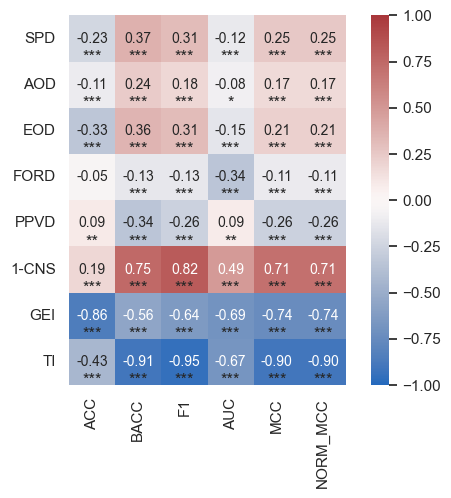

In [36]:
# original, spearman
g = corr_heatmap_with_significance_acc_fair(results_all_converted[accuracy_map+fairness_map])
g.figure.savefig('./Heatmap/'+data_name+'_original_acc_fair_corr'+'.png', bbox_inches='tight')

### Changes of Metrics

In [37]:
df_metric_diff = get_df_metric_diff(results_all_converted, metric_list=accuracy_map+fairness_map)
df_metric_diff

,dataset,base_estimator,Bias_Mitigation,ACC,BACC,F1,AUC,MCC,NORM_MCC,SPD,AOD,EOD,FORD,PPVD,1-CNS,GEI,TI
0,dataset,GB,RW,0.000398,0.004574,0.006257,-0.021453,0.006383,0.003191,0.019405,0.016684,0.019912,-0.025726,-0.001085,0.002482,-0.000445,-0.001044
1,dataset,GB,RW,-0.000265,0.001819,0.001992,-0.025257,0.001840,0.000920,0.015210,0.016621,0.014711,-0.013732,-0.001890,0.001889,-0.000047,-0.000347
2,dataset,GB,RW,-0.000199,-0.001589,-0.002217,0.000012,-0.002135,-0.001068,-0.043550,0.048459,-0.029511,0.048228,0.017484,-0.001261,0.000156,0.000363
3,dataset,GB,RW,0.001217,0.000444,0.002661,0.000667,0.003007,0.001503,-0.079938,-0.073631,-0.054850,0.032100,0.041111,-0.001902,-0.000419,-0.000305
4,dataset,GB,RW,0.000088,0.003415,0.004562,-0.021453,0.004377,0.002189,0.018324,0.014851,0.019674,-0.024603,0.000250,0.002110,-0.000250,-0.000736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,dataset,GB,AD,-0.000376,-0.006121,-0.011372,-0.000636,-0.007069,-0.003535,-0.084543,-0.011573,-0.035527,0.094020,0.041483,-0.003070,0.000333,0.001274
16,dataset,GB,AD,0.013315,-0.071109,-0.117405,0.171495,-0.028978,-0.014489,-0.075167,0.023837,-0.034556,0.035970,0.035093,-0.060406,-0.004049,0.010591
17,dataset,GB,AD,0.015815,-0.093393,-0.144269,0.142081,-0.049416,-0.024708,-0.089567,0.023787,-0.050240,0.064026,0.035806,-0.072443,-0.003790,0.014667
18,dataset,GB,AD,0.015593,0.099698,0.323218,0.015127,0.326011,0.163006,0.000914,0.050057,0.001659,-0.129504,0.000414,0.028838,-0.010036,-0.023658


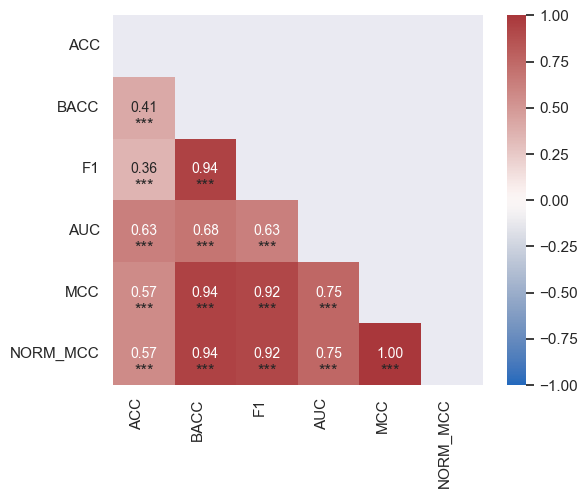

In [38]:
# change, spearman
g = corr_heatmap_with_significance(df_metric_diff[accuracy_map], acc=True)
g.figure.savefig('./Heatmap/'+data_name+'_change_acc_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])

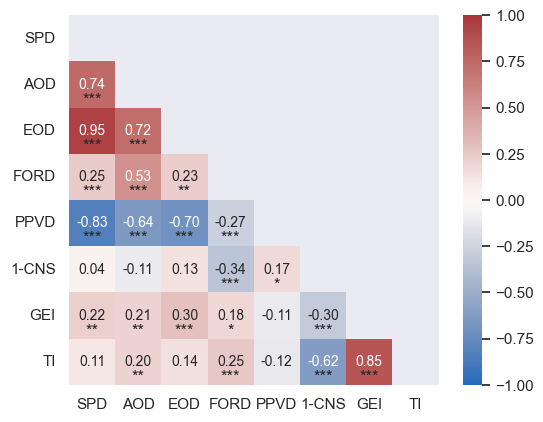

In [39]:
# change, spearman
g = corr_heatmap_with_significance(df_metric_diff[fairness_map])
g.figure.savefig('./Heatmap/'+data_name+'_change_fair_corr'+'.png', bbox_inches='tight')
# corr_heatmap_with_significance(results_all_converted[accuracy_map+fairness_map])